In [125]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#rf import
from sklearn.ensemble import RandomForestClassifier



random_state = 42

data = pd.read_csv('new_data/clean-data_without_outliers.csv')
data.columns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [126]:
# input_cols = ['GP','oRebounds','dRebounds','dq','PostMinutes','PostPoints',
#                 'PostoRebounds','PostdRebounds','PostRebounds','PostAssists',
#                 'PostSteals','PostBlocks','PostTurnovers','PostPF','PostDQ',
#                 'career_year','ft%','fg%','three%','gs%','Postft%','Postfg%',
#                 'Postthree%','Postgs%','efg%','ts%','ppg','rpg','apg','spg',
#                 'bpg','eff','pp36','defensive_prowess','defensive_discipline',
#                 'mpg','award_count','playoff_progression', 'playoff']
#less input cols
input_cols = ['ft%','fg%','three%','gs%',
              #'Postft%','Postfg%','Postthree%','Postgs%', #postseason
              #'efg%','ts%',
              'ppg','rpg','apg','spg','bpg','eff', 'pp36',
              'defensive_prowess','defensive_discipline',
              'mpg','award_count', 'height', 'weight', 'pos']

#'ft%', 'efg%', 'ts%', 'eff', 'defensive_prowess', 'defensive_discipline', 'mpg'

known_columns = ['playerID', 'tmID', 'height', 'weight', 'pos', 'college','confID']

In [127]:


# Label encoding for string columns
label_encoders = {}
for column in ['confID', 'playerID', 'tmID']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

unique_years = data['year'].unique()
rolling_window_results = []

In [128]:
def get_accuracy_score(model):
    for i in range(1, len(unique_years)-1):
        train_years = unique_years[:i]
        test_year = unique_years[i]

        # Filter the data for stint = 0
        data_filtered = data[data['stint'] == 0]

        # Selecting only the known columns for X
        X_train = data_filtered[data_filtered['year'].isin(train_years)][input_cols]
        y_train = data_filtered[data_filtered['year'].isin(train_years)]['playoff']
        X_test = data_filtered[data_filtered['year'] == test_year][input_cols]
        y_test = data_filtered[data_filtered['year'] == test_year]['playoff']
        
        # Train and evaluate the model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        # Append the evaluation results
        rolling_window_results.append({
            'train_years': train_years,
            'test_year': test_year,
            'accuracy': accuracy
        })

In [129]:
#train with various models
dt_model = DecisionTreeClassifier()
get_accuracy_score(dt_model)

rf_model = RandomForestClassifier()
get_accuracy_score(rf_model)

for i in range(len(rolling_window_results)):
    print(rolling_window_results[i])

{'train_years': array([2]), 'test_year': 3, 'accuracy': 0.531578947368421}
{'train_years': array([2, 3]), 'test_year': 4, 'accuracy': 0.6094674556213018}
{'train_years': array([2, 3, 4]), 'test_year': 5, 'accuracy': 0.5253164556962026}
{'train_years': array([2, 3, 4, 5]), 'test_year': 6, 'accuracy': 0.5629139072847682}
{'train_years': array([2, 3, 4, 5, 6]), 'test_year': 7, 'accuracy': 0.4678362573099415}
{'train_years': array([2, 3, 4, 5, 6, 7]), 'test_year': 8, 'accuracy': 0.5095541401273885}
{'train_years': array([2, 3, 4, 5, 6, 7, 8]), 'test_year': 9, 'accuracy': 0.5823529411764706}
{'train_years': array([2, 3, 4, 5, 6, 7, 8, 9]), 'test_year': 10, 'accuracy': 0.5033557046979866}
{'train_years': array([2]), 'test_year': 3, 'accuracy': 0.5947368421052631}
{'train_years': array([2, 3]), 'test_year': 4, 'accuracy': 0.5266272189349113}
{'train_years': array([2, 3, 4]), 'test_year': 5, 'accuracy': 0.5949367088607594}
{'train_years': array([2, 3, 4, 5]), 'test_year': 6, 'accuracy': 0.5430

In [130]:
input_cols = ['ft%','fg%','three%','gs%',
              #'Postft%','Postfg%','Postthree%','Postgs%', #postseason
              #'efg%','ts%',
              'ppg','rpg','apg','spg','bpg','eff', 'pp36',
              'defensive_prowess','defensive_discipline',
              'mpg','award_count', 'height', 'weight', 'pos', 'playoff']

data = data[input_cols]

In [131]:
with_nulls = []
for i in data.isna().any().items():
    print(i)
    if i[1]:
        with_nulls.append(i[0])
        print(i[0])

('ft%', False)
('fg%', False)
('three%', False)
('gs%', False)
('ppg', False)
('rpg', False)
('apg', False)
('spg', False)
('bpg', False)
('eff', False)
('pp36', False)
('defensive_prowess', False)
('defensive_discipline', False)
('mpg', False)
('award_count', False)
('height', False)
('weight', False)
('pos', False)


In [132]:
def corr_plot(corr):

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

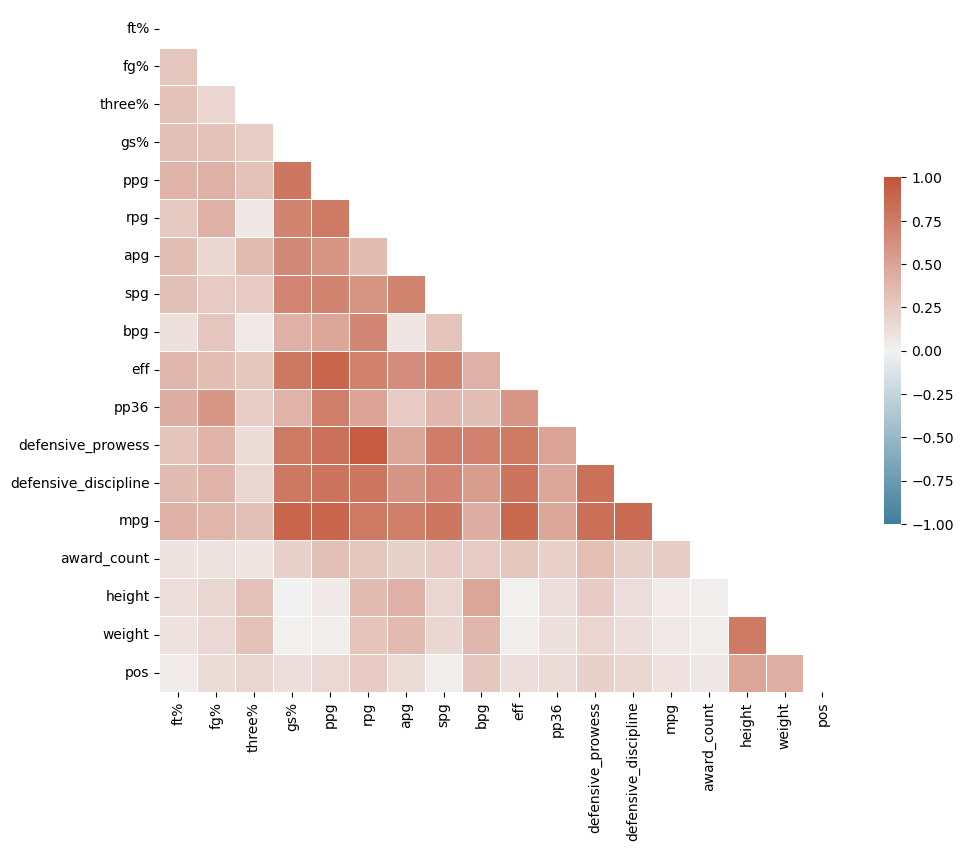

In [133]:
cor_matrix = data[input_cols].corr().abs()
corr_plot(cor_matrix)

In [134]:
val = cor_matrix['playoff'].sort_values(ascending=True)
sorted_columns = val.index.values
sorted_columns

KeyError: 'playoff'

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,ft%,fg%,three%,gs%,ppg,rpg,apg,spg,bpg,eff,pp36,defensive_prowess,defensive_discipline,mpg,award_count,playoff,height,weight,pos
ft%,NaN,0.277625,0.306969,0.316658,0.404850,0.259905,0.335057,0.313886,0.112823,0.375088,0.432752,0.295725,0.337890,0.420118,0.086544,0.002978,0.127368,0.101756,0.037489
fg%,NaN,NaN,0.183532,0.311636,0.421689,0.421059,0.170634,0.256062,0.275319,0.335158,0.579266,0.391855,0.393738,0.390334,0.099209,0.050502,0.172580,0.156318,0.134397
three%,NaN,NaN,NaN,0.234359,0.298812,0.066363,0.344524,0.250016,0.046979,0.268260,0.234179,0.134834,0.174689,0.318097,0.076869,0.007736,0.300828,0.298448,0.174695
gs%,NaN,NaN,NaN,NaN,0.783471,0.700906,0.665006,0.689994,0.408168,0.777488,0.399196,0.755793,0.779315,0.891073,0.209781,0.014005,0.003858,0.014348,0.124412
ppg,NaN,NaN,NaN,NaN,NaN,0.766660,0.588800,0.696005,0.479108,0.896600,0.736389,0.812752,0.797542,0.890980,0.315203,0.034368,0.053842,0.027865,0.161794
rpg,NaN,NaN,NaN,NaN,NaN,NaN,0.348609,0.596118,0.678047,0.706124,0.496762,0.953794,0.790149,0.767061,0.278818,0.054462,0.344146,0.290069,0.243842
apg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.697597,0.070758,0.637626,0.243251,0.483773,0.589723,0.737723,0.207229,0.036090,0.409503,0.356344,0.136159
spg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289317,0.703568,0.373504,0.742697,0.692041,0.781509,0.252455,0.020403,0.179347,0.171684,0.029103
bpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.419151,0.331116,0.725307,0.537387,0.436686,0.257523,0.032341,0.490999,0.367670,0.272212
eff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582921,0.763002,0.799462,0.880145,0.280942,0.032299,0.012255,0.031165,0.123840


In [ ]:
corr = data.corr().abs()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]

In [ ]:
selected_columns = selected_columns[1:].values
selected_columns.shape

(14,)

In [ ]:
selected_columns

array(['fg%', 'three%', 'gs%', 'ppg', 'rpg', 'apg', 'spg', 'bpg', 'pp36',
       'award_count', 'playoff', 'height', 'weight', 'pos'], dtype=object)

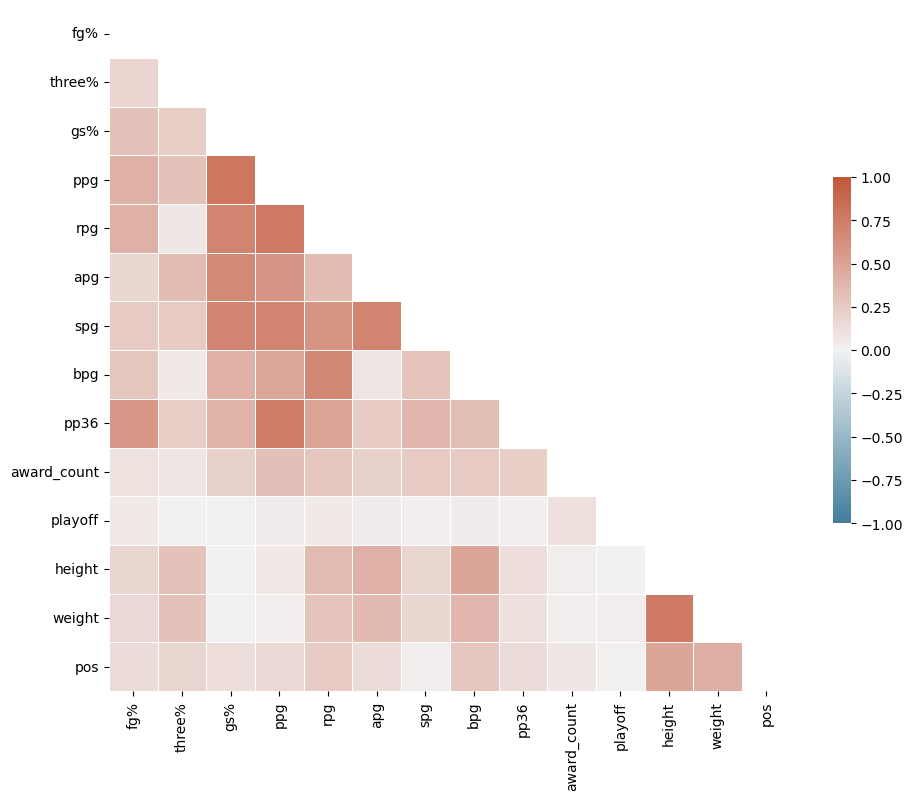

In [ ]:
data = data[selected_columns]
corr_plot(data.corr().abs())

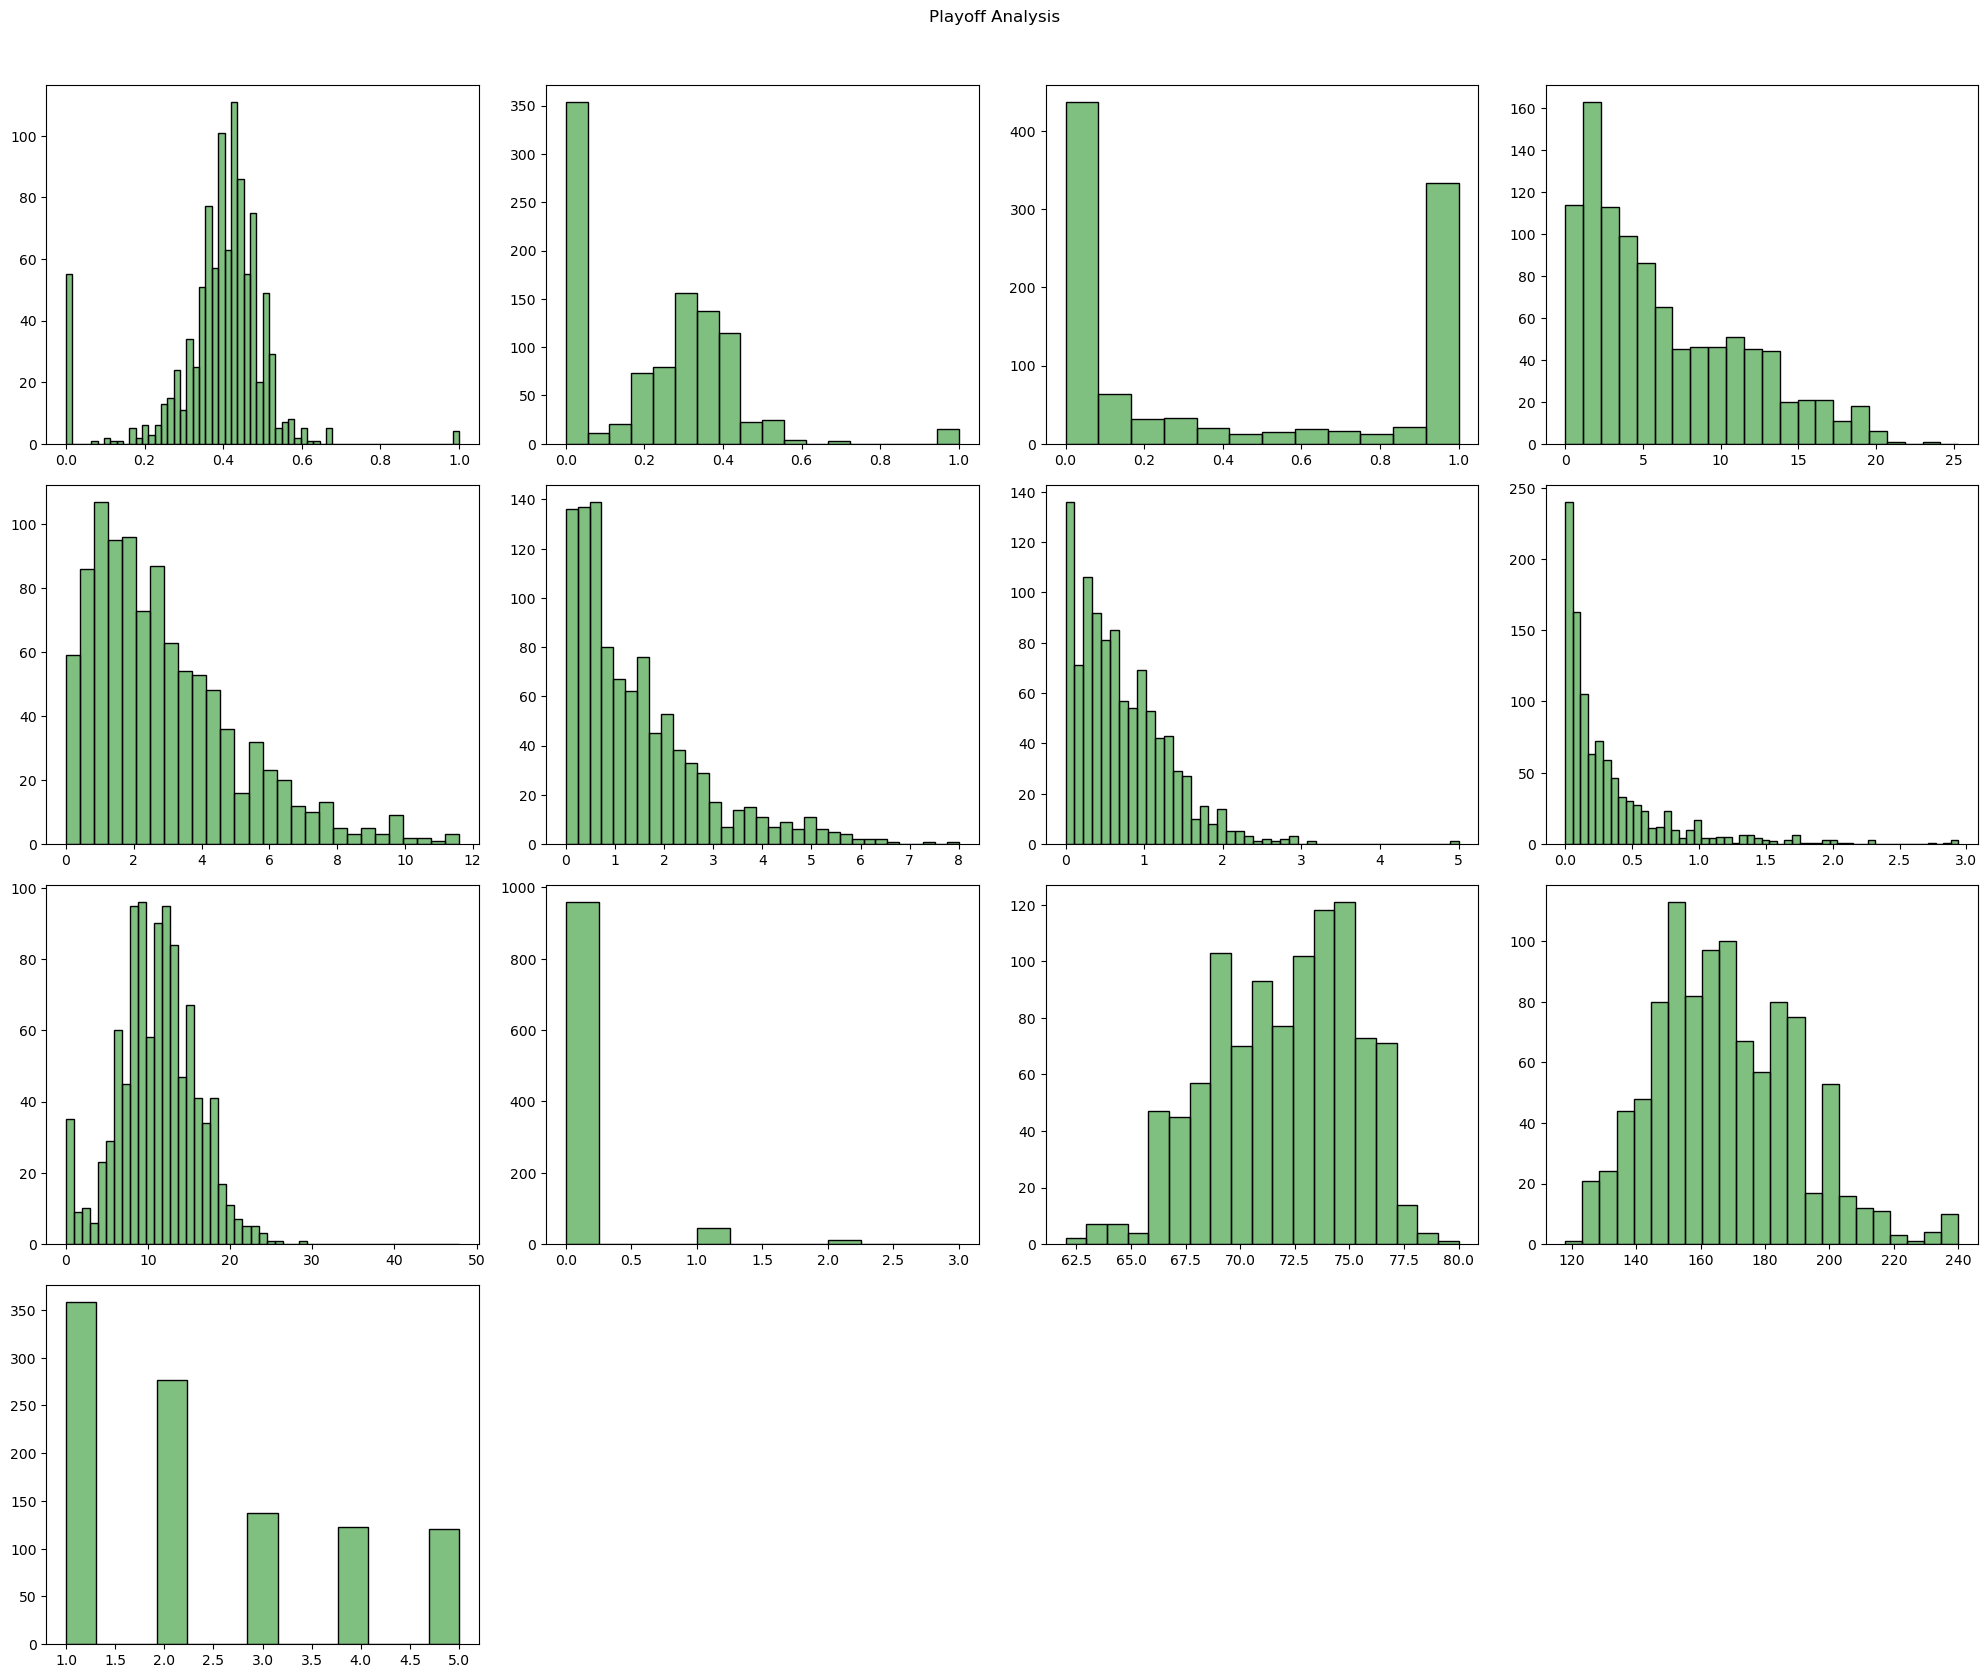

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
fig = plt.figure(figsize=(20, 25))
j = 0

# Iterate over each column, excluding 'playoff'
for i in data.columns:
    if i != 'playoff': 
        plt.subplot(6, 4, j+1)
        j += 1
        column_name = i

        # Plot histogram with hue for differentiation
        #check which columns have errors
        try:
            sns.histplot(data, x=i, hue='playoff', palette=['r', 'g'], kde=True)
            plt.legend(title=column_name, loc='best', labels=['Did not make playoffs', 'Made playoffs'])
            plt.xlabel(column_name)
            plt.ylabel('Count')
        except:
            pass

        # Set the title and adjust layout
fig.suptitle('Playoff Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

# Display the plot
plt.show()

In [ ]:
Y = data["playoff"].values
X = data.drop(["playoff"], axis=1).values

In [ ]:

estimator = DecisionTreeClassifier(splitter='best', min_samples_split=6, min_samples_leaf=5, max_features='sqrt', max_depth=41, criterion='gini')
selector = RFECV(estimator, cv=TimeSeriesSplit(), scoring='roc_auc')
selector.fit(X, Y)

RFECV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
      estimator=DecisionTreeClassifier(max_depth=41, max_features='sqrt',
                                       min_samples_leaf=5,
                                       min_samples_split=6),
      scoring='roc_auc')

In [ ]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X.shape[1]):
    row = {'feature': i, 'support': selector.support_[i], 'ranking': selector.ranking_[i]}
    df_features = df_features._append(row, ignore_index=True)
    
df_features.sort_values(by='ranking').head(10)

,feature,support,ranking
0,0,True,1
1,1,True,1
2,2,True,1
3,3,True,1
4,4,True,1
5,5,True,1
6,6,True,1
7,7,True,1
8,8,True,1
10,10,True,1
